# Basic setup + Viewing data (Please see the README file for a description of what this code does!)

In [1]:
# @title Import required dependencies { display-mode: "form" }

!pip install vorbin

print("Vorbin installed")

from vorbin.voronoi_2d_binning import *
vb = voronoi_2d_binning
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

print("All libraries imported")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 3.0 MB/s eta 0:00:00
Vorbin installed
All libraries imported


In [2]:
# @title Get image data, setting image limits manually

#@ markdown Use this code? If unchecked, data will not be extracted using the code below.

use_code = False # @param {type:"boolean"}

#get image data from fits file, designate limits of image we want to view

imgfile = "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrarange_nopoints.fits" # @param ["/content/drive/MyDrive/Summer 2024/Fits_Images/merged_img_ds9.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_merged_nopoints.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrarange_nopoints.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_17006_points_excluded.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_22966_points_excluded.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_22967_24968_points_excluded.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_22603_25095_points_excluded.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrange_17006_nopoints.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrange_22966_nopoints.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrange_22967_24968_nopoints.fits", "/content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrange_22603_25095_nopoints.fits"]

# @markdown Limits given in pixels of the original image, inclusive of last index

# @markdown Note: This code assumes a 1-to-1 ratio between image coordinates and Sky coordinates.

xlims = [115, 223] # @param
ylims = [180, 288] # @param

xskylims = [4028, 4136] # @param
yskylims = [4037, 4145] # @param

pointing_center = [4096.5, 4096.5]

#Sky coords of AGN: x=4091, y=4095
#Sky coords of pointing center: x, y=4096.5
#-------------------------#
'''following limits are for img_chandrarange_nopoints.fits ONLY:'''

#center galaxy and include its FULL extent

# xlims = [133, 223]
# ylims = [53, 157]

'''following limits are for merged_nopoints.fits ONLY:'''

#AGN is at roughly x=364, y=238 in img_merged_nopoints.fits

#center the galaxy and contain most of its extent

# xlims = [329, 399]
# ylims = [200, 275]

#(roughly) center the extended emission

# xlims = [335, 405]
# ylims = [210, 280]

'''Recreating voronoi_attempt_2 conditions'''
# xlims = [329, 399]
# ylims = [200, 275]

# xskylims = [4057, 4126]
# yskylims = [4058, 4132]

def get_data(imagefile, xlimits, ylimits):
  with fits.open(imgfile) as hdul:
    hdul.info()
    full_data = hdul[0].data
    (full_height, full_width) = full_data.shape

  data = full_data[ylims[0]-1:ylims[1],xlims[0]-1:xlims[1]]
  return data, full_data

if use_code: data, full_data = get_data(imgfile, xlims, ylims)

In [3]:
# @title Get image data, but using pre-set image limits so you can switch between images faster { run: "auto" }
# @markdown Make sure to be careful that the limits you've set up are what you intended though!

# @markdown If use_code is unchecked, data will not be extracted using the below code. Make sure the this box is checked for the above cell if it's not checked for this one.

use_code = True # @param {type:"boolean"}

filename = "img_chandrarange_nopoints.fits" # @param ["img_merged_nopoints.fits", "img_chandrarange_nopoints.fits", "img_17006_points_excluded.fits", "img_22966_points_excluded.fits", "img_22967_24968_nopoints_evt.fits", "img_22603_25095_nopoints_evt.fits", "img_chandrange_17006_nopoints.fits", "img_chandrange_22966_nopoints.fits", "img_chandrange_22967_24968_nopoints.fits", "img_chandrange_22603_25095_nopoints.fits"]

imgfile = "/content/drive/MyDrive/Summer 2024/Fits_Images/" + filename
pointing_center = [4096.5, 4096.5]

if filename == "img_merged_nopoints.fits":
  xlims = [316, 423]
  ylims = [186, 293]
  xskylims = [4043, 4150]
  yskylims = [4043, 4150]
elif filename == "img_chandrarange_nopoints.fits":
  xlims = [130, 237]
  ylims = [53, 160]
  xskylims = [4043, 4150]
  yskylims = [4043, 4150]
elif filename == "img_17006_points_excluded.fits":
  xlims = [317, 425]
  ylims = [206, 314]
  xskylims = [4044, 4152]
  yskylims = [4063, 4171]
elif filename == "img_22966_points_excluded.fits":
  xlims = [115, 223]
  ylims = [180, 288]
  xskylims = [4028, 4136]
  yskylims = [4037, 4145]
elif filename == "img_22967_24968_nopoints_evt.fits":
  xlims = [128, 236]
  ylims = [188, 296]
  xskylims = [4057.88, 4165.88]
  yskylims = [4040.05, 4148.05]
elif filename == "img_22603_25095_nopoints_evt.fits":
  xlims = [126, 234]
  ylims = [186, 294]
  xskylims = [4032.88, 4140.88]
  yskylims = [4038.02, 4146.02]
elif filename == "img_chandrange_17006_nopoints.fits":
  xlims = [131, 239]
  ylims = [206, 314]
  xskylims = [4044, 4152]
  yskylims = [4063, 4171]
elif filename == "img_chandrange_22966_nopoints.fits":
  xlims = [115, 223]
  ylims = [180, 288]
  xskylims = [4028,4136]
  yskylims = [4037, 4145]
elif filename == "img_chandrange_22967_24968_nopoints.fits":
  xlims = [145, 253]
  ylims = [183, 291]
  xskylims = [4058, 4166]
  yskylims = [4040, 4148]
elif filename == "img_chandrange_22603_25095_nopoints.fits":
  xlims = [120, 228]
  ylims = [181, 289]
  xskylims = [4033, 4141]
  yskylims = [4038, 4146]
else:
  print("The limits of the file you're trying to use haven't been entered.")

def get_data(imagefile, xlimits, ylimits):
  with fits.open(imgfile) as hdul:
    hdul.info()
    full_data = hdul[0].data
    (full_height, full_width) = full_data.shape

  data = full_data[ylims[0]-1:ylims[1],xlims[0]-1:xlims[1]]
  return data, full_data

data, full_data = get_data(imgfile, xlims, ylims)

print(f"X limits: {xlims}\nY limits: {ylims}")
print(f"X sky limits: {xskylims}\nY sky limits: {yskylims}")

Filename: /content/drive/MyDrive/Summer 2024/Fits_Images/img_chandrarange_nopoints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (367, 214)   float32   
X limits: [130, 237]
Y limits: [53, 160]
X sky limits: [4043, 4150]
Y sky limits: [4043, 4150]


In [4]:
# @title Plot utils { run: "auto" }

#Read in one or more polygons from a .reg file, then turn them into arrays that can be plotted in pyplot.

obsid = "merged" # @param ["17006", "22966", "22967_24968", "22603_25095", "merged"]
contour_file = f"/content/drive/MyDrive/Summer 2024/Galaxy_and_Extended_Regions/ic750_{obsid}sky.reg"
extended_file = f"/content/drive/MyDrive/Summer 2024/Galaxy_and_Extended_Regions/ext_{obsid}sky.reg"

print(contour_file)
print(extended_file)

def polygon_to_array(infile):
  list_of_polygon_arrays = []
  with open(infile, 'r') as f:
    lines = f.readlines()
    for line in lines:
      if not line.startswith('polygon('):
        continue
      list_of_strings = line.split('polygon(')[1].split(')')[0].split(',')
      list_of_coords = [float(num) for num in list_of_strings]
      X = list_of_coords[::2]
      Y = list_of_coords[1::2]
      X.append(X[0])
      Y.append(Y[0])
      if len(X) != len(Y):
        print("File error: Length of X not the same as length of Y!")
      list_of_polygon_arrays.append((X, Y))
  return list_of_polygon_arrays

contours = polygon_to_array(contour_file)
extended = polygon_to_array(extended_file)

#Plot contours obtained using the function above, given a set of x- and y-limits as well as an optional set of contour levels with which to label the contours. If parameter lims is set to 0, then 0 is taken for the lower x and y limits.

def plot_contours(contour_set, ax, skylims=(xskylims, yskylims), imglims=(xlims, ylims), full=False, **kwargs):

  if full: #to be used if you're using the full image.
    xlower = skylims[0][0] - imglims[0][0]
    ylower = skylims[1][0] - imglims[1][0]
  else:
    xlower, ylower = skylims[0][0], skylims[1][0]

  for i in range(len(contour_set)):
    galaxy_x = np.array(contour_set[i][0]) - xlower
    galaxy_y = np.array(contour_set[i][1]) - ylower
    ax.plot(galaxy_x, galaxy_y, **kwargs)

def set_axes(ax, xlim, ylim, xstep=None, ystep=None):
  if xstep is None:
    xstep = (xlim[1]-xlim[0]+1)/10
  if ystep is None:
    ystep = (ylim[1]-ylim[0]+1)/10

  xticks = np.arange(xlim[0], xlim[1]+1, xstep)
  yticks = np.arange(ylim[0], ylim[1]+1, ystep)

  ax.set_xticks(xticks - xlim[0])
  ax.set_yticks(yticks - ylim[0])

  ax.set_xticklabels(xticks, fontsize = 'small')
  ax.set_yticklabels(yticks, fontsize = 'small')

  ax.set_xlim(-0.5, xlim[1]-xlim[0]-0.5)
  ax.set_ylim(-0.5, ylim[1]-ylim[0]-0.5)

/content/drive/MyDrive/Summer 2024/Galaxy_and_Extended_Regions/ic750_mergedsky.reg
/content/drive/MyDrive/Summer 2024/Galaxy_and_Extended_Regions/ext_mergedsky.reg


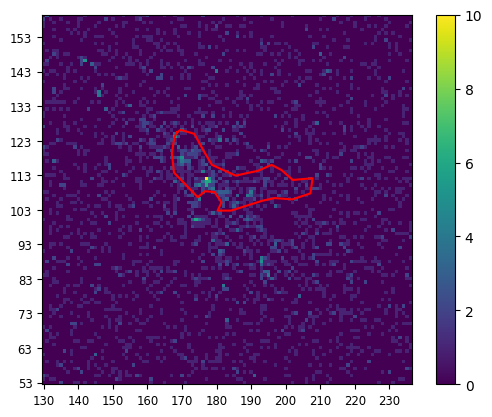

In [5]:
# @title Plot image { run: "auto" }

#plot data
'''
mode options:
  'full' for just the full image
  'zoom' for just the zoomed image
  'both' for both
'''

mode = "zoom" # @param ["zoom", "full", "both"]

plot_galaxy = False # @param {type:"boolean"}
plot_extended = True # @param {type:"boolean"}

if mode == 'both':
  fig, (ax1, ax2) = plt.subplots(1, 2)
  im1 = ax1.imshow(full_data, cmap='viridis', origin='lower')
  (full_height, full_width) = full_data.shape
  set_axes(ax1, [1, full_width], [1, full_height], 50, 50)

  im2 = ax2.imshow(data, cmap='viridis', origin='lower')
  set_axes(ax2, xlims, ylims, 10, 10)
  fig.colorbar(im2, ax=ax2)

  if plot_galaxy:
    plot_contours(contours, ax1, full=True, color='white')
    plot_contours(contours, ax2, color='white')

  if plot_extended:
    plot_contours(extended, ax1, full=True, color='red')
    plot_contours(extended, ax2, color='red')

  plt.tight_layout()

elif mode == 'zoom':
  fig, ax = plt.subplots()
  im = ax.imshow(data, cmap='viridis', origin='lower')
  set_axes(ax, xlims, ylims, 10, 10)
  plt.colorbar(im, ax=ax)

  if plot_galaxy:
    plot_contours(contours, ax, color='white')

  if plot_extended:
    plot_contours(extended, ax, color='red')

elif mode == 'full':
  fig, ax = plt.subplots()
  im = ax.imshow(full_data, cmap='viridis', origin='lower')
  plt.colorbar(im, ax=ax)
  (full_height, full_width) = full_data.shape
  set_axes(ax, [1, full_width], [1, full_height], 50, 50)

  if plot_galaxy:
    plot_contours(contours, ax, full=True, color='white')

  if plot_extended:
    plot_contours(extended, ax, full=True, color='red')

fig.show()

In [6]:
# @title For a given polygon region, find and return a list of all pixels whose centres lie inside the region

'''
polygon: a tuple of form (X,Y), where X and Y are lists that (when matched by indices) contain each point (x, y) of the polygon (x and y here will probably be floats)
image: nested array where image[y][x] corresponds to the pixel at x, y (x and y here will be integers)
skylims: 2-tuple with skylims[0] being a list of the lower and upper X-limits in Sky coordinates. skylims[1] is the same for Y-limits.
'''
def get_pixels_within_polygon(polygon, image, skylims=(xskylims, yskylims)):
  #First we want to define the polygon at each point corresponding to a pixel centre. It should be sufficient to get the polygon point for each X pixel value. Then, we can count how many pixels lie between each occurence of the polygon on a given Y-axis.

  new_polygon = ([], [])
  curr = [polygon[0][0] - skylims[0][0],
            polygon[1][0] - skylims[1][0]]

  def line(x, m, point):
    return m * (x - point[0]) + point[1]

  for i in range(len(polygon[0])-1):

    next = [polygon[0][i+1] - skylims[0][0],
            polygon[1][i+1] - skylims[1][0]]

    slope = (next[1] - curr[1]) / (next[0] - curr[0])

    # print("***")
    # print(curr[0], curr[1])

    step = 1 if next[0] - curr[0] > 0 else -1
    if step == 1:
      start = int(curr[0])+1
      stop = int(next[0])+1
    else:
      start = int(curr[0])
      stop = int(next[0])

    for x in range(start, stop, step):
      new_polygon[0].append(x)
      new_polygon[1].append(line(x, slope, curr))
    #   print(f"\t{x}\t{line(x, slope, curr)}")
    # print(next[0], next[1])

    #Set the current point to the next one in the list
    curr = next

  #Now that we've appropriately redefined the polygon in the form of new_polygon, we project vertical lines through it, each with an x-value that lies within the polygon. For each initial intersection of a projection line with the polygon, we add to our list each pixel that the line subsequently passes through until it reaches another intersection.

  points_in_polygon = ([], [])
  new_polygon = np.array(new_polygon)

  min_x, max_x = int(min(new_polygon[0])), int(max(new_polygon[0]))

  # print(new_polygon)
  for x in range(min_x, max_x + 1):
    intersects = np.nonzero(new_polygon[0] == x)
    sorted_ys = np.sort(new_polygon[1][intersects])
    i = 0
    while i < len(sorted_ys):
      for y in range(int(sorted_ys[i])+1, int(sorted_ys[i+1])+1):
        points_in_polygon[0].append(x)
        points_in_polygon[1].append(y)
      i += 2

  return np.array(points_in_polygon)

# pixels = get_pixels_within_polygon(extended[0])

# print(pixels)
# print(len(pixels[0]))
# fig, ax = plt.subplots(dpi=200)
# ax.imshow(data, origin='lower')
# plot_contours(extended, ax, color='red', lw=0.5)
# ax.scatter(pixels[0], pixels[1], marker='.', color='y', s=0.5)
# set_axes(ax, xlims, ylims, 10, 10)

In [7]:
# @title Prepare data for Voronoi binning

'''
Get the data into the required form for Voronoi binning. Specifically, we need:
- a 1-D array containing the X-coordinate of each pixel
- a 1-D array containing the Y-coordinate of each pixel
- a 1-D array containing the count of each pixel
- a 1-D array containing the noise of each pixel (i.e. the square root of the count)
The length of each array should equal the number of pixels in the image, and each pixel should correspond to a single index in the arrays.

As the programme doesn't work if any noise values are 0, I set the noise to 1 for any instances where signal = 0.
An alternative approach, considered a few cells below, is to remove any pixels with signal=0.
'''
# @markdown Region file to include in the data. Check this carefully against any members of exclude_regions to make sure no weirdness arises.
region_of_interest = "" # @param {type:"string"}

# @markdown List of region files to exclude from the data.
exclude_regions = [] # @param

if not region_of_interest and not exclude_regions:
  height, width = ylims[1]-ylims[0]+1, xlims[1]-xlims[0]+1
  X = np.ravel([np.arange(xlims[0], xlims[1]+1) for i in range(height)])
  Y = np.ravel([np.full(width, i) for i in range(ylims[0], ylims[1]+1)])
  counts = np.ravel(data)
  counts_noise = np.sqrt(counts + 0.75) + 1

#Include only points lying within the extended region
#-----
if region_of_interest:
  pixels = get_pixels_within_polygon(contours[-1])
  raw_x, raw_y = pixels[0], pixels[1]
  counts = np.array([])
  for i in range(len(pixels[0])):
    counts = np.append(counts, data[pixels[1][i], pixels[0][i]])
  counts_noise = np.sqrt(counts + 0.75) + 1

  negative_image = np.full((height, width), -1)
  negative_image[pixels[1], pixels[0]] = counts

  plt.imshow(negative_image, origin='lower')
#-----

#Exclude points lying within select regions
# regfiles = ['/content/drive/MyDrive/Summer 2024/Galaxy_and_Extended_Regions/ext_mergedsky.reg']
#-----
# if exclude_regions:
#   all_counts = np.ravel(data)
#   for regfile in regfiles:
#     reg = polygon_to_array(regfile)
#     pixels = get_pixels_within_polygon(reg[0])

#   negative_image = np.full((height, width), -1)
#   negative_image[pixels[1], pixels[0]] = counts

#   plt.imshow(negative_image, origin='lower')
#-----

#incorrect indexing of image data, solely to match some previous results. Delete the following lines if you don't know why they're here lol
#------
# v2_data = full_data[ylims[0]:ylims[1],xlims[0]:xlims[1]]
# counts = np.ravel(v2_data)
# counts_noise = np.sqrt(counts + 0.75) + 1
#------

# print(np.sum(counts))
# print(len(counts))
# print(np.mean(counts))
# print(np.median(counts))
# print(np.std(counts))

# Voronoi bin irregularly-shaped images

In [ ]:
# @title Use default WVT

target_sn = 1.9 # @param {type:"number"}

bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(raw_x, raw_y, counts, counts_noise, target_sn=target_sn, pixelsize=1, quiet=True, plot=True)

bin_image = np.full((height, width), -1)
bin_image[pixels[1], pixels[0]] = bin_number

print_details = True # @param {type:"boolean"}

if print_details:
  sum = 0
  print(filename)
  for i in np.unique(bin_number):
    region_count = np.sum(counts[bin_number == i])
    print(f"Region {i}: {region_count} counts, S/N = {sn[i]}, (x, y) = ({x_bar[i]}, {y_bar[i]})")
    sum += region_count

  print(f"Average counts: {sum / len(np.unique(bin_number))}")

  # print(sn)
  # print(nPixels)

# Default Voronoi-binning function

img_chandrarange_nopoints.fits


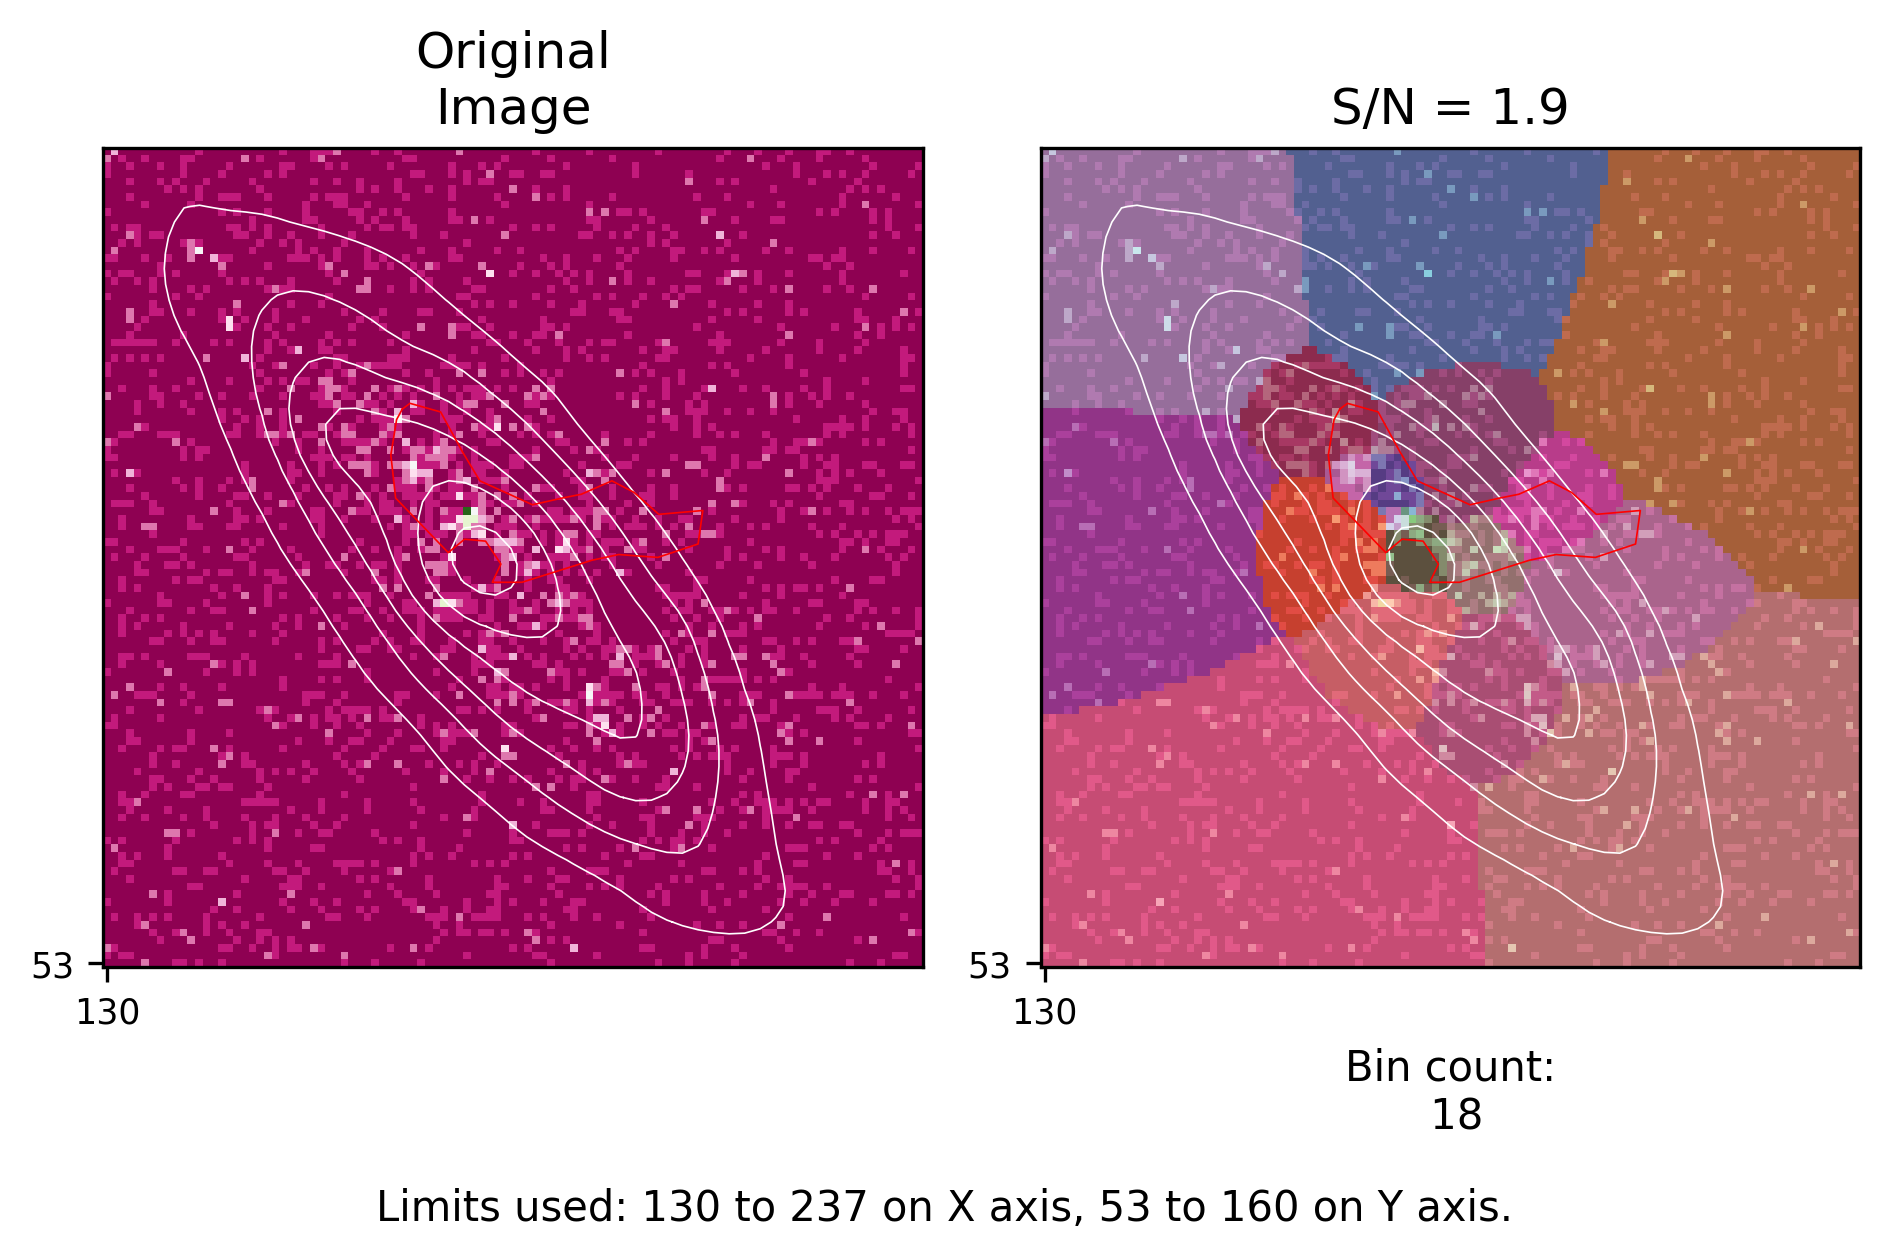

In [ ]:
# @title Try many different S/N ratios for Voronoi binning
# @markdown Each S/N given will be used to make a distinct set of Voronoi bins
list_of_sns = [1.9] # @param
plot_galaxy = True # @param {type:"boolean"}
plot_extended = True # @param {type:"boolean"}

#Correct-ish Poisson errors at low n (84.13% confidence bars)
counts_noise = np.sqrt(counts + 0.75) + 1

fig, axs = plt.subplots(1, len(list_of_sns) + 1, dpi = 300)

'''Voronoi bin with many different target counts, and plot the results of each to compare.'''

axs[0].imshow(data, origin='lower', cmap='PiYG') #for IR contours

#plot galaxy contours and extended region
if plot_galaxy:
  plot_contours(contours, axs[0], color='white', lw=0.4)

if plot_extended:
  plot_contours(extended, axs[0], color='red', lw=0.4)

set_axes(axs[0], xlims, ylims, width, height)

axs[0].set_title('Original\nImage')

for i in range(len(list_of_sns)):
  ax = axs[i+1]
  sn_i = list_of_sns[i]
  bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=sn_i, pixelsize=1, plot=False)
  bin_image = np.reshape(bin_number, (height, width))
  ax.imshow(bin_image, cmap='tab20', origin='lower')
  ax.imshow(data, cmap='PiYG', origin='lower', alpha=0.5)
  ax.set_title(f'S/N = {sn_i}')
  ax.set_xlabel(f'Bin count:\n {np.max(bin_number)+1}')

  #plot contours and extended
  if plot_galaxy:
      plot_contours(contours, ax, color='white', lw=0.4)
  if plot_extended:
      plot_contours(extended, ax, color='red', lw=0.4)

  set_axes(ax, xlims, ylims, width, height)

fig.text(0.5, 0.04, f"Limits used: {xlims[0]} to {xlims[1]} on X axis, {ylims[0]} to {ylims[1]} on Y axis.", ha='center')
plt.tight_layout()
print(filename)

img_chandrarange_nopoints.fits
Region 0: 48.0 counts, S/N = 3.0345988273620605, (x, y) = (175.6595744680851, 115.53191489361703)
Region 1: 35.0 counts, S/N = 3.7379977703094482, (x, y) = (176.0, 111.0)
Region 2: 112.0 counts, S/N = 3.3350741863250732, (x, y) = (165.4848484848485, 106.66666666666667)
Region 3: 116.0 counts, S/N = 3.3933892250061035, (x, y) = (174.23357664233578, 93.47080291970804)
Region 4: 66.0 counts, S/N = 3.462679386138916, (x, y) = (178.74647887323943, 106.22535211267606)
Region 5: 95.0 counts, S/N = 4.01973295211792, (x, y) = (187.2882882882883, 104.72972972972973)
Region 6: 432.0 counts, S/N = 4.907720565795898, (x, y) = (157.13159216474133, 70.15971873430436)
Region 7: 244.0 counts, S/N = 3.8156228065490723, (x, y) = (143.27063339731285, 106.60268714011517)
Region 8: 45.0 counts, S/N = 3.3825907707214355, (x, y) = (169.89285714285714, 116.67857142857143)
Region 9: 138.0 counts, S/N = 4.3527750968933105, (x, y) = (164.52777777777777, 124.625)
Region 10: 152.0 cou

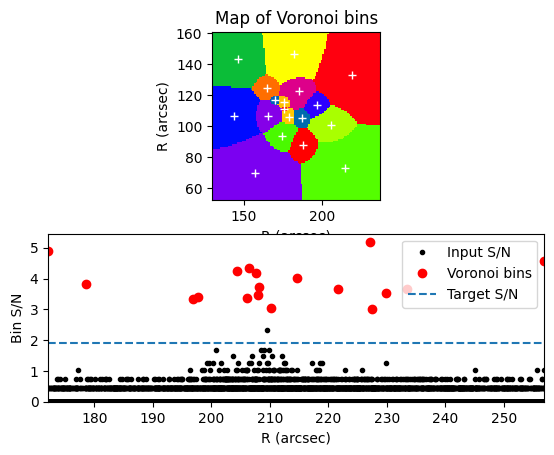

In [ ]:
# @title Voronoi-bin for only a chosen S/N
target_sn = 1.9 # @param {type:"number"}

bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=target_sn, pixelsize=1, quiet=True, plot=True)

print_details = True # @param {type:"boolean"}

if print_details:
  sum = 0
  print(filename)
  for i in np.unique(bin_number):
    region_count = np.sum(counts[bin_number == i])
    print(f"Region {i}: {region_count} counts, S/N = {sn[i]}, (x, y) = ({x_bar[i]}, {y_bar[i]})")
    sum += region_count

  print(f"Average counts: {sum / len(np.unique(bin_number))}")

bin_image = np.reshape(bin_number, (height, width))

# print(np.sum(counts)
  # print(sn)
  # print(nPixels)

#Altering the Voronoi algorithm

In [ ]:
# @title Allowing the algorithm to be used on data with optimal weighting (WORK IN PROGRESS)
# @markdown For an explanation of the weighting see as seen in Sec. 2.1 of Cappellari & Copin (2003).

# @markdown The only code change made (so far) was adding a calculation of the optimal weights array. The counts and noise arrays are then replaced by thei respective multiplications by this array.

def vb_with_weighting(x, y, signal, noise, target_sn, weights=None, cvt=True, pixelsize=None,
                       plot=True, quiet=True, sn_func=None, wvt=True):
    """
    VorBin Purpose
    --------------

    Perform adaptive spatial binning of two-dimensional data
    to reach a chosen constant signal-to-noise ratio per bin.
    This program implements the algorithm described in section 5.1 of
    `Cappellari & Copin (2003) <http://adsabs.harvard.edu/abs/2003MNRAS.342..345C>`_.
    """

    assert x.size == y.size == signal.size == noise.size, \
        'Input vectors (x, y, signal, noise) must have the same size'
    assert np.all((noise > 0) & np.isfinite(noise)), \
        'NOISE must be positive and finite'

    if sn_func is None:
        sn_func = _sn_func

    # Perform basic tests to catch common input errors
    #

    #MY EDIT: multiply the signal and noise arrays by weights to achieve optimal weighting.
    #POSSIBLE FURTHER EDIT: As the weight factor maximises S/N of coadded pixels regardless of any constant it is multiplied by, it might make sense to "rescale" weightings so the pixel with the max S/N has a weight of 1.

    if weights:
      signal *= weights
      noise *= weights

    #Rescaling weights code?
    # if weights:
    #   max_weight = np.max(weights)
    #   weights /= max_weight
    #   signal *= weights
    #   noise *= weights

    if sn_func(np.flatnonzero(noise > 0), signal, noise) < target_sn:
        raise ValueError("""Not enough S/N in the whole set of pixels.
            Many pixels may have noise but virtually no signal.
            They should not be included in the set to bin,
            or the pixels should be optimally weighted.
            See Cappellari & Copin (2003, Sec.2.1) and README file.""")
    if np.min(signal/noise) > target_sn:
        raise ValueError('All pixels have enough S/N and binning is not needed')

    t1 = clock()
    if not quiet:
        print('Bin-accretion...')
    classe, pixelsize = _accretion(
        x, y, signal, noise, target_sn, pixelsize, quiet, sn_func)
    if not quiet:
        print(np.max(classe), ' initial bins.')
        print('Reassign bad bins...')
    xnode, ynode = _reassign_bad_bins(classe, x, y)
    if not quiet:
        print(xnode.size, ' good bins.')
    t2 = clock()
    if cvt:
        if not quiet:
            print('Modified Lloyd algorithm...')
        xnode, ynode, scale, it = _cvt_equal_mass(
            x, y, signal, noise, xnode, ynode, pixelsize, quiet, sn_func, wvt)
        if not quiet:
            print(it, ' iterations.')
    else:
        scale = np.ones_like(xnode)
    classe, xBar, yBar, sn, area = _compute_useful_bin_quantities(
        x, y, signal, noise, xnode, ynode, scale, sn_func)
    single = area == 1
    t3 = clock()
    if not quiet:
        print('Unbinned pixels: ', np.sum(single), ' / ', x.size)
        print('Fractional S/N scatter (%):', np.std(sn[~single] - target_sn, ddof=1)/target_sn*100)
        print('Elapsed time accretion: %.2f seconds' % (t2 - t1))
        print('Elapsed time optimization: %.2f seconds' % (t3 - t2))

    if plot:
        plt.clf()
        plt.subplot(211)
        rnd = np.argsort(np.random.random(xnode.size))  # Randomize bin colors
        _display_pixels(x, y, rnd[classe], pixelsize)
        plt.plot(xnode, ynode, '+w', scalex=False, scaley=False) # do not rescale after imshow()
        plt.xlabel('R (arcsec)')
        plt.ylabel('R (arcsec)')
        plt.title('Map of Voronoi bins')

        plt.subplot(212)
        rad = np.sqrt(xBar**2 + yBar**2)  # Use centroids, NOT generators
        plt.plot(np.sqrt(x**2 + y**2), signal/noise, '.k', label='Input S/N')
        if np.any(single):
            plt.plot(rad[single], sn[single], 'xb', label='Not binned')
        plt.plot(rad[~single], sn[~single], 'or', label='Voronoi bins')
        plt.xlabel('R (arcsec)')
        plt.ylabel('Bin S/N')
        plt.axis([np.min(rad), np.max(rad), 0, np.max(sn)*1.05])  # x0, x1, y0, y1
        plt.plot([np.min(rad), np.max(rad)], [target_sn, target_sn], ls='--', label='Target S/N')
        plt.legend()

    return classe, xnode, ynode, xBar, yBar, sn, area, scale

In [ ]:
# @title Original voronoi code, just in case I need to reference it/make a future change to it

def vb(x, y, signal, noise, target_sn, cvt=True, pixelsize=None,
                       plot=True, quiet=True, sn_func=None, wvt=True):
    """
    VorBin Purpose
    --------------

    Perform adaptive spatial binning of two-dimensional data
    to reach a chosen constant signal-to-noise ratio per bin.
    This program implements the algorithm described in section 5.1 of
    `Cappellari & Copin (2003) <http://adsabs.harvard.edu/abs/2003MNRAS.342..345C>`_.
    """

    assert x.size == y.size == signal.size == noise.size, \
        'Input vectors (x, y, signal, noise) must have the same size'
    assert np.all((noise > 0) & np.isfinite(noise)), \
        'NOISE must be positive and finite'

    if sn_func is None:
        sn_func = _sn_func

    # Perform basic tests to catch common input errors
    #
    if sn_func(np.flatnonzero(noise > 0), signal, noise) < target_sn:
        raise ValueError("""Not enough S/N in the whole set of pixels.
            Many pixels may have noise but virtually no signal.
            They should not be included in the set to bin,
            or the pixels should be optimally weighted.
            See Cappellari & Copin (2003, Sec.2.1) and README file.""")
    if np.min(signal/noise) > target_sn:
        raise ValueError('All pixels have enough S/N and binning is not needed')

    t1 = clock()
    if not quiet:
        print('Bin-accretion...')
    classe, pixelsize = _accretion(
        x, y, signal, noise, target_sn, pixelsize, quiet, sn_func)
    if not quiet:
        print(np.max(classe), ' initial bins.')
        print('Reassign bad bins...')
    xnode, ynode = _reassign_bad_bins(classe, x, y)
    if not quiet:
        print(xnode.size, ' good bins.')
    t2 = clock()
    if cvt:
        if not quiet:
            print('Modified Lloyd algorithm...')
        xnode, ynode, scale, it = _cvt_equal_mass(
            x, y, signal, noise, xnode, ynode, pixelsize, quiet, sn_func, wvt)
        if not quiet:
            print(it, ' iterations.')
    else:
        scale = np.ones_like(xnode)
    classe, xBar, yBar, sn, area = _compute_useful_bin_quantities(
        x, y, signal, noise, xnode, ynode, scale, sn_func)
    single = area == 1
    t3 = clock()
    if not quiet:
        print('Unbinned pixels: ', np.sum(single), ' / ', x.size)
        print('Fractional S/N scatter (%):', np.std(sn[~single] - target_sn, ddof=1)/target_sn*100)
        print('Elapsed time accretion: %.2f seconds' % (t2 - t1))
        print('Elapsed time optimization: %.2f seconds' % (t3 - t2))

    if plot:
        plt.clf()
        plt.subplot(211)
        rnd = np.argsort(np.random.random(xnode.size))  # Randomize bin colors
        _display_pixels(x, y, rnd[classe], pixelsize)
        plt.plot(xnode, ynode, '+w', scalex=False, scaley=False) # do not rescale after imshow()
        plt.xlabel('R (arcsec)')
        plt.ylabel('R (arcsec)')
        plt.title('Map of Voronoi bins')

        plt.subplot(212)
        rad = np.sqrt(xBar**2 + yBar**2)  # Use centroids, NOT generators
        plt.plot(np.sqrt(x**2 + y**2), signal/noise, '.k', label='Input S/N')
        if np.any(single):
            plt.plot(rad[single], sn[single], 'xb', label='Not binned')
        plt.plot(rad[~single], sn[~single], 'or', label='Voronoi bins')
        plt.xlabel('R (arcsec)')
        plt.ylabel('Bin S/N')
        plt.axis([np.min(rad), np.max(rad), 0, np.max(sn)*1.05])  # x0, x1, y0, y1
        plt.plot([np.min(rad), np.max(rad)], [target_sn, target_sn], ls='--', label='Target S/N')
        plt.legend()

    return classe, xnode, ynode, xBar, yBar, sn, area, scale

<function vb at 0x7df909b768c0>


# Messing with the noise values (deprecated)

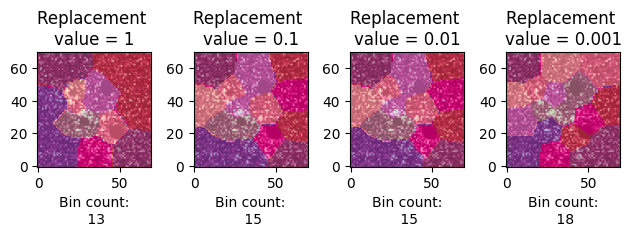

In [ ]:
# @title Trying different noise values for the 0-noise pixels
# @markdown Noise values given will replace the 0s in the noise array for each plot
list_of_noise_vals = [1, 0.1, 0.01, 0.001] # @param {type:"raw"}
test_sn = 5 # @param {type:"integer"}

'''Voronoi bin for different replacement values for noise of 0-count pixels'''

fig, axs = plt.subplots(1, len(list_of_noise_vals))

for i in range(len(list_of_noise_vals)):
  ax = axs[i]
  noise_repl = list_of_noise_vals[i]
  counts_noise = np.sqrt(counts)
  counts_noise[counts_noise == 0] = noise_repl
  bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=test_sn, pixelsize=1, plot=False)
  bin_image = np.reshape(bin_number, (height, width))
  ax.imshow(bin_image, cmap='Accent', origin='lower')
  ax.imshow(data[ylims[0]:ylims[1],xlims[0]:xlims[1]], cmap='PiYG', origin='lower', alpha=0.6)
  ax.set_title(f'Replacement \nvalue = {noise_repl}')
  ax.set_xlabel(f'Bin count:\n {max(bin_number)+1}')

plt.tight_layout()

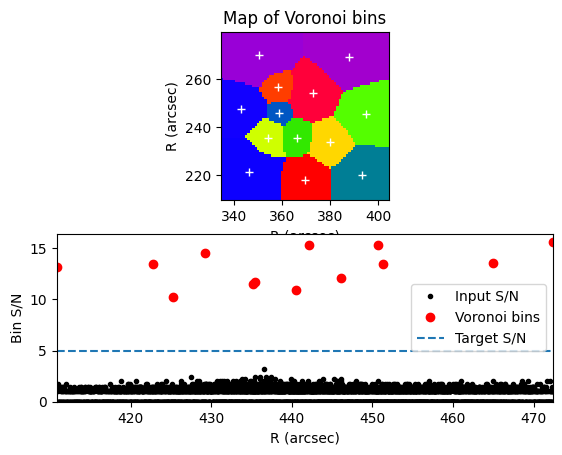

In [ ]:
# @title Voronoi bin for just one noise replacement value

noise_repl = 1 # @param {type:"number"}
test_sn = 5 # @param {type:"integer"}

''' Now we get the map of the bins and write a function to trace their border!
    (And to output the coordinates that trace that border)'''
counts_noise = np.sqrt(counts)
counts_noise[counts_noise == 0] = noise_repl
bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=test_sn, pixelsize=1, plot=True)

# Equalising counts using Voronoi binning

File: img_chandrarange_nopoints.fits
Region 0: 56.0 counts, S/N = 4.13, (x, y) = (174.88, 110.31)
Region 1: 57.0 counts, S/N = 3.13, (x, y) = (179.98, 106.03)
Region 2: 64.0 counts, S/N = 2.92, (x, y) = (169.46, 106.04)
Region 3: 60.0 counts, S/N = 2.95, (x, y) = (178.62, 97.54)
Region 4: 59.0 counts, S/N = 2.02, (x, y) = (166.08, 94.15)
Region 5: 58.0 counts, S/N = 2.36, (x, y) = (177.37, 86.75)
Region 6: 59.0 counts, S/N = 1.78, (x, y) = (163.24, 76.58)
Region 7: 60.0 counts, S/N = 1.79, (x, y) = (151.19, 87.44)
Region 8: 66.0 counts, S/N = 1.97, (x, y) = (153.69, 106.00)
Region 9: 61.0 counts, S/N = 1.87, (x, y) = (137.14, 96.87)
Region 10: 71.0 counts, S/N = 3.21, (x, y) = (164.53, 115.51)
Region 11: 64.0 counts, S/N = 1.85, (x, y) = (138.15, 77.65)
Region 12: 69.0 counts, S/N = 2.04, (x, y) = (152.43, 62.22)
Region 13: 67.0 counts, S/N = 1.98, (x, y) = (137.25, 114.85)
Region 14: 56.0 counts, S/N = 1.66, (x, y) = (169.83, 60.23)
Region 15: 54.0 counts, S/N = 1.76, (x, y) = (180.89

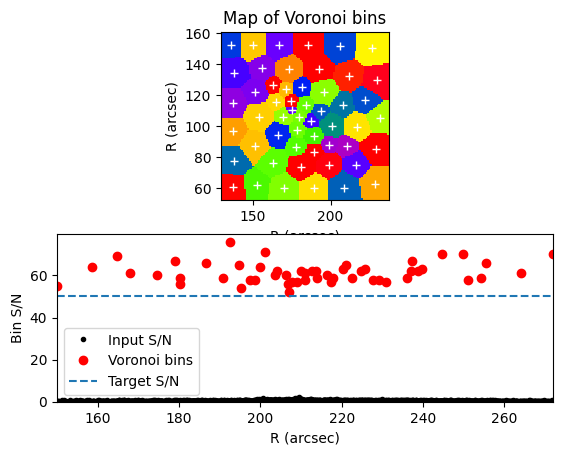

In [ ]:
# @title Equalising total region counts rather than S/N

target_counts = 50 # @param {type:"integer"}
print_details = True # @param {type:"boolean"}

def counts_function(index, signal=None, noise=None):
  return np.sum(signal[index])

bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=target_counts, pixelsize=1, sn_func=counts_function, plot=True)

if print_details:
  sum = 0
  print("File: " + filename)
  for i in np.unique(bin_number):
    indices = np.flatnonzero(bin_number == i)
    sn_i = np.sum(counts[indices])/np.sqrt(np.sum(counts_noise[indices] ** 2))
    region_count = np.sum(counts[bin_number == i])
    print(f"Region {i}: {region_count} counts, S/N = {sn_i:.2f}, (x, y) = ({x_bar[i]:.2f}, {y_bar[i]:.2f})")
    sum += region_count

  print(f"Average counts: {sum / len(np.unique(bin_number))}")

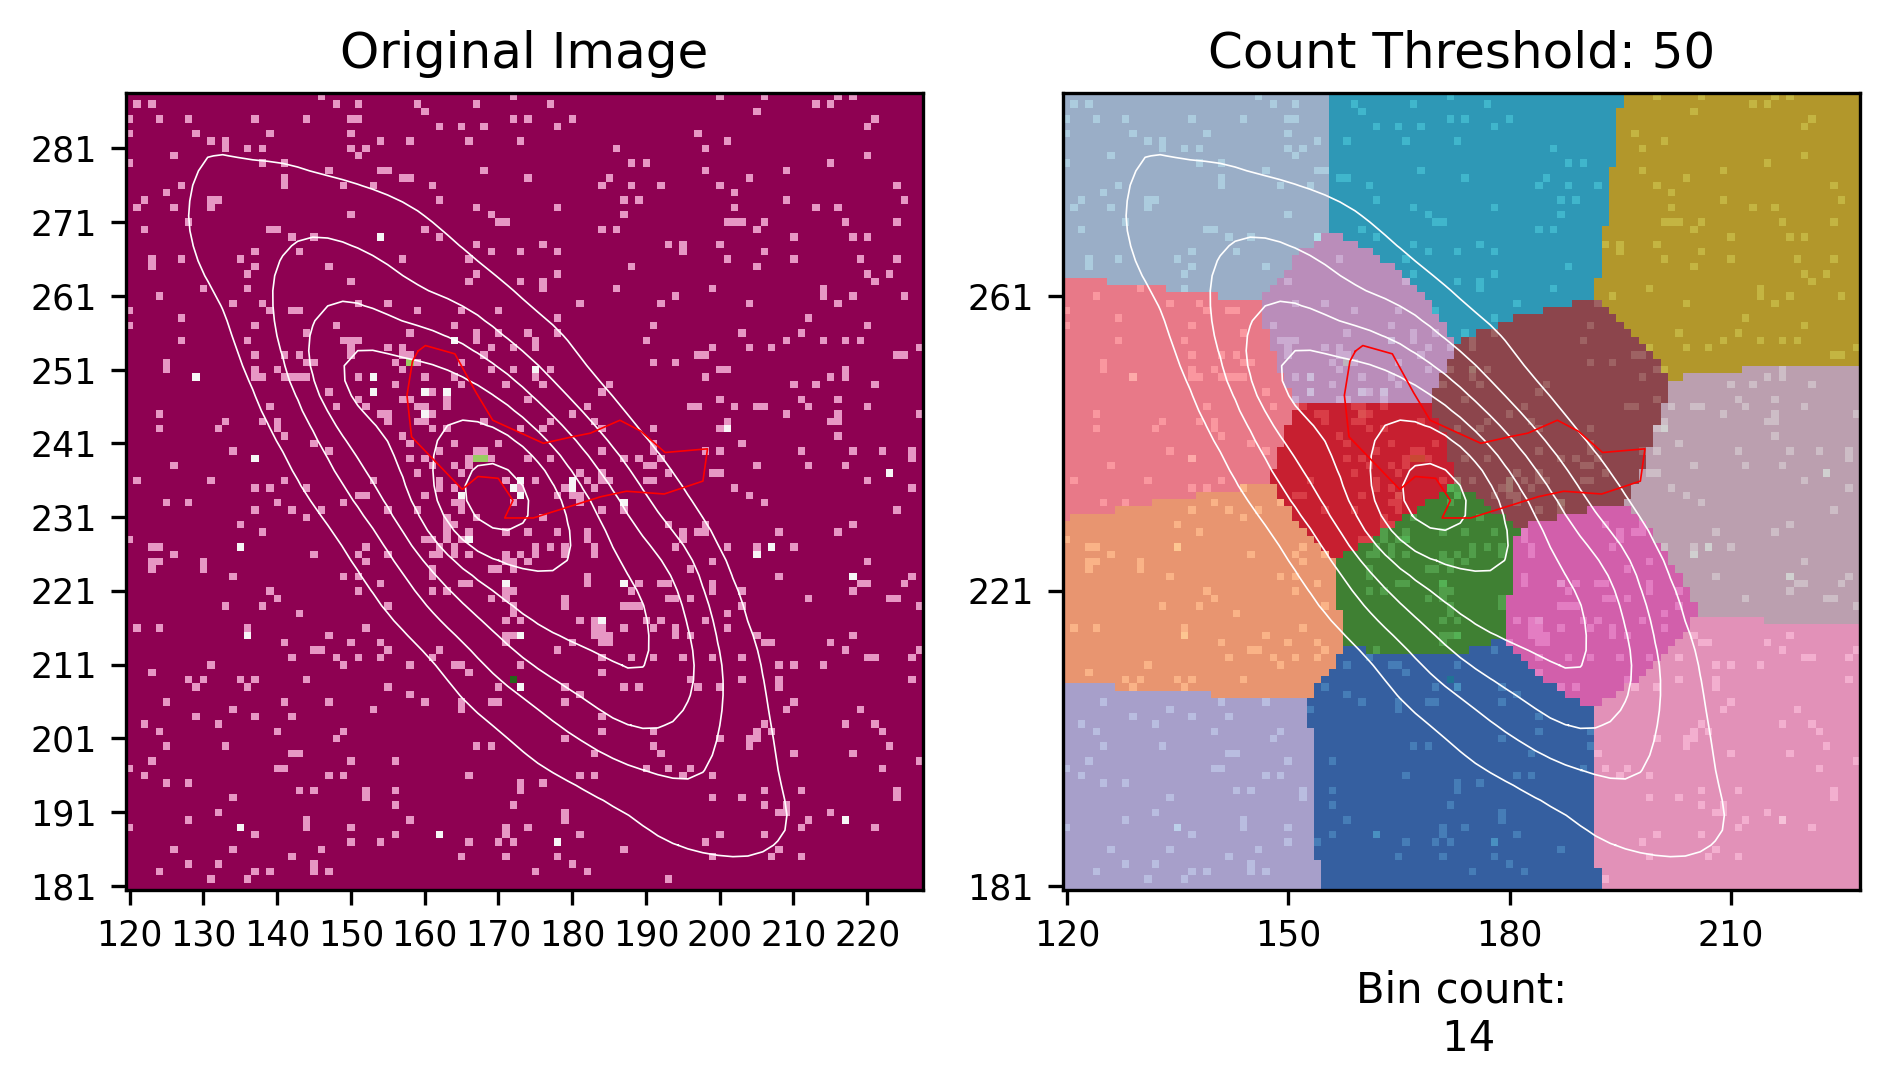

In [ ]:
# @title Try many different count thresholds for Voronoi binning, and also plot optical galaxy contours on each
# @markdown Each count given will be used to make a distinct set of Voronoi bins

list_of_counts = [50] # @param
plot_galaxy = True # @param {type:"boolean"}
plot_extended = True # @param {type:"boolean"}

def counts_function(index, signal=None, noise=None):
  return np.sum(signal[index])

'''Voronoi bin with many different target counts, and plot the results of each to compare.'''

#Correct-ish Poisson errors at low n (84.13% confidence bars)
counts_noise = np.sqrt(counts + 0.75) + 1

fig, axs = plt.subplots(1, len(list_of_counts)+1, dpi=300)

axs[0].imshow(data, origin='lower', cmap='PiYG') #for IR contours

#get galaxy contours, define their levels, and plot them over the image
if plot_galaxy:
  plot_contours(contours, axs[0], lw=0.4, color='white')

#plot extended region on top
if plot_extended:
  plot_contours(extended, axs[0], lw=0.4, color='red')

set_axes(axs[0], xlims, ylims, 10, 10)

axs[0].set_title('Original Image')

#Now we make a plot for each of the count values in the list given
for i in range(len(list_of_counts)):
  ax = axs[i+1]
  count_i = list_of_counts[i]
  bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = vb(X, Y, counts, counts_noise, target_sn=count_i, pixelsize=1, plot=False, sn_func=counts_function)
  bin_image = np.reshape(bin_number, (height, width))
  ax.imshow(bin_image, cmap='tab20', origin='lower')
  ax.imshow(data, cmap='PiYG', origin='lower', alpha=0.2)
  ax.set_title(f'Count Threshold: {count_i}')
  ax.set_xlabel(f'Bin count:\n {np.max(bin_number)+1}')

  #plot galaxy contours
  if plot_galaxy:
    plot_contours(contours, ax, lw=0.4, color='white')

  #plot extended region
  if plot_extended:
    plot_contours(extended, ax, lw=0.4, color='red')

  #set axes parameters
  set_axes(ax, xlims, ylims, 30, 40)

plt.tight_layout()

# Getting the information on our regions

Region	Counts	Pixels	S/N
0	48.0	47	3.0345988273620605
1	35.0	9	3.7379977703094482
2	112.0	264	3.3350741863250732
3	116.0	274	3.3933892250061035
4	66.0	71	3.462679386138916
5	95.0	111	4.01973295211792
6	432.0	1991	4.907720565795898
7	244.0	1042	3.8156228065490723
8	45.0	28	3.3825907707214355
9	138.0	216	4.3527750968933105
10	152.0	299	4.18472957611084
11	85.0	182	3.02051043510437
12	139.0	338	3.669973611831665
13	160.0	499	3.5453219413757324
14	402.0	2012	4.561817169189453
15	460.0	2002	5.195379257202148
16	242.0	1116	3.672168493270874
17	287.0	1163	4.237545013427734


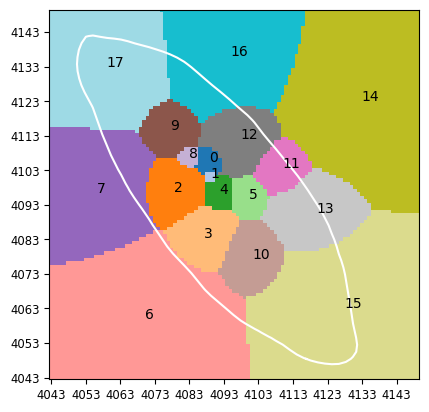

In [ ]:
# @title Get the Voronoi bins for the parameters we want

''' Now we get the map of the bins and write a function to trace their border!
    (And to output the coordinates that trace that border)'''
fig, ax = plt.subplots()
# bin_image = np.reshape(bin_number, (height, width))
plt.imshow(bin_image, origin='lower', cmap='tab20')

#use physical coordinate system rather than image pixels

use_phys_coords = True # @param {type:"boolean"}

if use_phys_coords:
  set_axes(ax, xskylims, yskylims, 10, 10)
else:
  set_axes(ax, xlims, ylims, 10, 10)

#plot galaxy contours and extended region

plot_galaxy = True # @param {type:"boolean"}
plot_extended = False # @param {type:"boolean"}

if plot_galaxy:
  plot_contours([contours[-1]], ax, color='white')

if plot_extended:
  plot_contours(extended, ax, color='red')

#print out details about the region counts, S/Ns, etc.
print_details = True # @param {type:"boolean"}

if print_details:
  print("Region\tCounts\tPixels\tS/N")
  for i in np.unique(bin_number):
    region_count = np.sum(counts[bin_number == i])
    print(f"{i}\t{region_count}\t{nPixels[i]}\t{sn[i]}")
    plt.annotate(str(i), (x_bar[i] - xlims[0], y_bar[i] - ylims[0]))

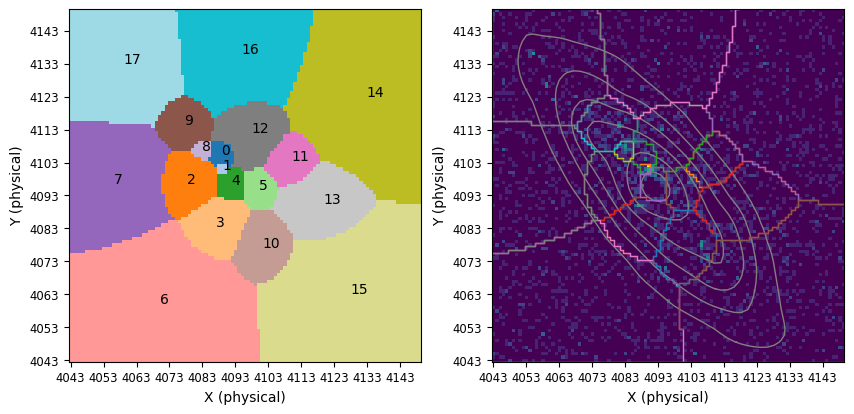

In [ ]:
# @title Second draft of border-tracing function

# @markdown Make the axes display Sky coordinates instead of image pixel coordinates.
physical_coords = True # @param {type:"boolean"}
plot_galaxy = True # @param {type:"boolean"}
plot_extended = False # @param {type:"boolean"}
'''More streamlined function that only gives the coordinates of VERTICES'''

def trace_border(bin_map, bin_number):

  #add a border with bin number -1 to the bin map. This allows the pointer that we will initialise to navigate the edges of the image without throwing an error.
  framed_map = np.full((height+2, width+2), -1)
  framed_map[1:-1, 1:-1] = bin_map

  #start at a guarantted vertex pixel-- in this case the first pixel we encounter with the required bin number
  start = np.asarray(np.unravel_index(np.argmax(framed_map == bin_number), framed_map.shape))
  x, y = start[1], start[0]

  #initialise a "shadow pixel" that will stick to the cell but stay outside the bin region.
  #the shadow pixel should start just to the left of the current cell
  sx, sy = x, y-1

  #initialise a list with the coordinates of the pixel's corner (the one coincident with the actual vertex of the region shape)
  start_corner = np.array([x-0.5, y-0.5])
  border_coords = []
  border_coords.append(start_corner)

  #For debugging
  # print(f"Current pixel: ({x}, {y}). Current shadow: ({sx}, {sy}). Corner added: {start_corner}")
  # print(border_coords)

  directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]]) #possible directions, given as [delta_x, delta_y]
  d_ind = 0 #starting direction is to the right

  #move in the current direction. When a corner is encountered, record its coordinates and change direction such that you continue travelling along the border.

  #set our initial direction
  direction = directions[d_ind]

  n = 0
  while True:

    x += direction[0]
    y += direction[1]
    sx += direction[0]
    sy += direction[1]

    # print(x, y, sx, sy) #Debug

    if framed_map[y][x] == bin_number and framed_map[sy][sx] != bin_number:
      continue

    if framed_map[y][x] != bin_number and framed_map[sy][sx] != bin_number:
      # print(f"Corner found! Currently at {x}, {y}")
      sx, sy = x, y
      x -= direction[0]
      y -= direction[1]
      d_ind = (d_ind + 1) % 4
      direction = directions[d_ind]

      avgx, avgy = (x + sx)/2, (y + sy)/2
      new_coord = np.array([avgx, avgy]) - direction/2

      if new_coord[0] == start_corner[0] and new_coord[1] == start_corner[1]:
        break

      border_coords.append(new_coord)
      # print(f"Current pixel: ({x}, {y}). Current shadow: ({sx}, {sy}). Corner added: {new_coord}") #Debug

    if framed_map[y][x] == bin_number and framed_map[sy][sx] == bin_number:
      # print(f"Corner found! Currently at {x}, {y}") #Debug
      x, y = sx, sy
      sx -= direction[0]
      sy -= direction[1]
      d_ind = (d_ind - 1) % 4
      direction = directions[d_ind]

      avgx, avgy = (x + sx)/2, (y + sy)/2
      new_coord = np.array([avgx, avgy]) - direction/2

      if new_coord[0] == start_corner[0] and new_coord[1] == start_corner[1]:
        break

      border_coords.append(new_coord)
      # print(f"Current pixel: ({x}, {y}). Current shadow: ({sx}, {sy}). Corner added: {new_coord}") #Debug

#failsafe for while loop lol
    n += 1
    if n == 1000:
      print("limit reached")
      break

  borderx = np.array([point[0] for point in border_coords]) - 1
  bordery = np.array([point[1] for point in border_coords]) - 1
  return borderx, bordery, start

fig, axs = plt.subplots(1,2, figsize=(10,5))
im = axs[0].imshow(bin_image, origin='lower', cmap='tab20')
set_axes(axs[0], xlims, ylims)

im2 = axs[1].imshow(data, origin='lower')
# plt.colorbar(im2, ax=axs[1])

#Physical X and Y coords
if physical_coords:
  for ax in axs:
    set_axes(ax, xskylims, yskylims, 10, 10)
    ax.set_xlabel("X (physical)")
    ax.set_ylabel("Y (physical)")

else:
  for ax in axs:
    set_axes(ax, xlims, ylims, 10, 10)

#Plot galaxy and/or extended region
if plot_galaxy:
  plot_contours(contours, axs[1], color='gray', lw=1)
if plot_extended:
  plot_contours(extended, axs[1], color='red', lw=1)

#plot region borders
num_bins = len(np.unique(bin_number))
for i in range(num_bins):
  borderx, bordery, start = trace_border(bin_image, i)
  # axs[0].plot(borderx, bordery, lw=1)
  # axs[0].scatter(start[1]-0.5-1, start[0]-0.5-1, color='red')
  axs[1].plot(borderx, bordery, lw=1)
  # axs[1].scatter(start[1]-0.5-1, start[0]-0.5-1, color='red')
  axs[0].annotate(str(i), (x_bar[i] - xlims[0], y_bar[i] - ylims[0]))

plt.show()

In [ ]:
# @title Write all Voronoi regions to a region file

savefile = "/content/drive/MyDrive/Summer 2024/Voronoi Regions/justgalaxy_voronoi.reg" # @param {type:"string"}
verbose = True # @param {type:"boolean"}
imgfile_to_write = imgfile.split("/")[-1]

num_bins = len(np.unique(bin_number))

with open(savefile, 'w') as f:
  f.write(f" #Hello!\n# You should know the below polygon coordinates are in terms of the image pixels of {imgfile_to_write}.\n# To be able to use this/these regions with other .fits files, you first have to load this file into {imgfile_to_write} and then resave the regions using a more universal coordinate system.\n\n")
  for i in range(num_bins):
    borderx, bordery, start = trace_border(bin_image, i)
    borderx += xlims[0]
    bordery += ylims[0]
    polygon_string = "polygon("
    for j in range(len(borderx)-1):
      polygon_string += f"{borderx[j]},{bordery[j]},"
    polygon_string += f"{borderx[-1]},{bordery[-1]})"
    if verbose: print(f"Region {i}: {polygon_string}")
    f.write(f"{polygon_string}\n")

Region 0: polygon(355.5,242.5,360.5,242.5,360.5,243.5,362.5,243.5,362.5,244.5,363.5,244.5,363.5,248.5,362.5,248.5,362.5,251.5,361.5,251.5,361.5,252.5,360.5,252.5,360.5,254.5,353.5,254.5,353.5,253.5,352.5,253.5,352.5,251.5,351.5,251.5,351.5,245.5,352.5,245.5,352.5,244.5,353.5,244.5,353.5,243.5,355.5,243.5)
Region 1: polygon(352.5,220.5,354.5,220.5,354.5,221.5,355.5,221.5,355.5,222.5,356.5,222.5,356.5,223.5,357.5,223.5,357.5,224.5,358.5,224.5,358.5,225.5,360.5,225.5,360.5,226.5,361.5,226.5,361.5,227.5,362.5,227.5,362.5,228.5,363.5,228.5,363.5,229.5,362.5,229.5,362.5,230.5,361.5,230.5,361.5,231.5,360.5,231.5,360.5,233.5,359.5,233.5,359.5,235.5,358.5,235.5,358.5,240.5,359.5,240.5,359.5,242.5,355.5,242.5,355.5,243.5,353.5,243.5,353.5,244.5,352.5,244.5,352.5,245.5,349.5,245.5,349.5,244.5,348.5,244.5,348.5,243.5,346.5,243.5,346.5,242.5,344.5,242.5,344.5,241.5,342.5,241.5,342.5,240.5,340.5,240.5,340.5,239.5,339.5,239.5,339.5,238.5,340.5,238.5,340.5,236.5,341.5,236.5,341.5,235.5,342.5,235.5,342

# Making a heatmap of the regions

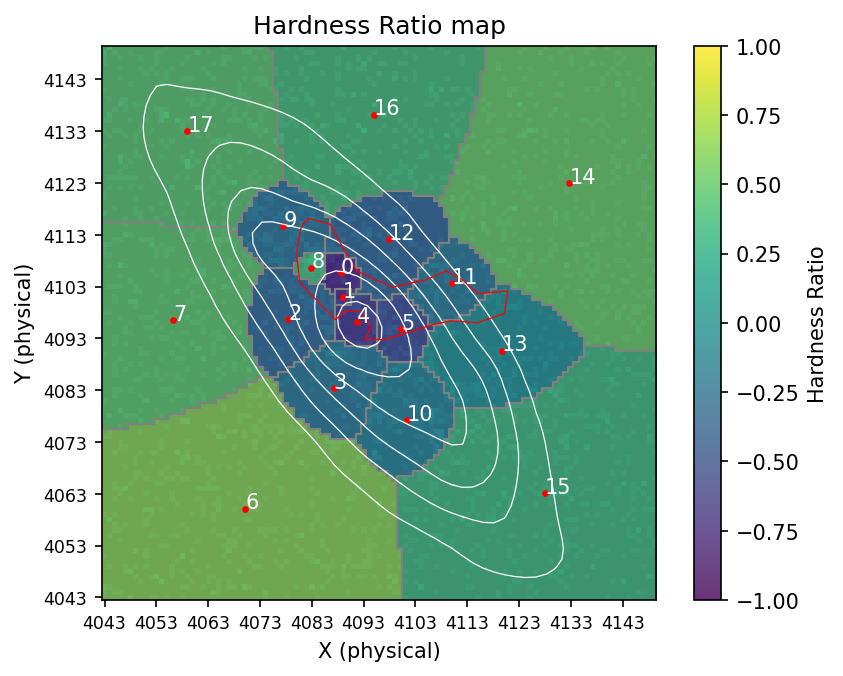

In [ ]:
# @title Create a heatmap of the regions (requires HRs to be taken externally and then plugged in here as an input)

plot_galaxy = True # @param {type:"boolean"}
plot_extended = True # @param {type:"boolean"}
physical_coords = True # @param {type:"boolean"}
show_borders = True # @param {type:"boolean"}
show_region_numbers = True # @param {type:"boolean"}
show_centroids = True # @param {type:"boolean"}

'''
In the below dictionary, enter each HR value like so:
First find the number of the corresponding region in the plot above.
Then, make an entry in the form [region number: HR value].
Do this for each region you want to plot on the heatmap.
'''

HR_dict = {
0: -0.702127659574468,
1: -0.722222222222222,
2: -0.232142857142857,
3: -0.120689655172413,
4: -0.575757575757575,
5: -0.452631578947368,
6: 0.600928074245939,
7: 0.475409836065573,
8: 0.377777777777777,
9: -0.148936170212765,
10: -0.0394736842105263,
11: -0.119047619047619,
12: -0.251798561151079,
13: 0.0559006211180124,
14: 0.502487562189054,
15: 0.353579175704989,
16: 0.388429752066115,
17: 0.459649122807017,
}

list_of_bins = HR_dict.keys()
list_of_HRs = HR_dict.values()

#convert voronoi bin data into a masked array where only the selected bins are visible with their HR color
unmasked_HR_array = np.select([bin_number == bin for bin in list_of_bins], [HR for HR in list_of_HRs], default=-2)
masked_array = np.ma.masked_where(unmasked_HR_array == -2, unmasked_HR_array, copy=True)
hrmap = np.reshape(masked_array, (height, width))

#get original image data to plot behind the Voronoi regions

fig, ax = plt.subplots(dpi=150)

#plot original image with HR map on top of it
im = ax.imshow(data, cmap='viridis', origin='lower')
# im2 = ax.imshow(hrmap, cmap='viridis', origin='lower', alpha = 0.8)
im2 = ax.imshow(hrmap, cmap='viridis', origin='lower', alpha = 0.8, vmin=-1, vmax=1)
plt.colorbar(im2, ax=ax, label='Hardness Ratio')

#plot borders of bins
if show_borders:
  for i in range(np.max(bin_number)):
    borderx, bordery, start = trace_border(bin_image, i)
    ax.plot(borderx, bordery, lw=1, color='gray')

if plot_galaxy:
  #plot galaxy contours
  plot_contours(contours, ax, color='white', lw=0.6)

if plot_extended:
  #plot extended region
  plot_contours(extended, ax, color='red', lw=0.6)

if show_centroids:
  #plot centroids of each Voronoi region
  ax.scatter(x_bar-xlims[0], y_bar-ylims[0], s=5, color='red')

#set x- and y-axes to show ticks in the right places
if physical_coords:
  set_axes(ax, xskylims, yskylims, 10, 10)
  ax.set_xlabel("X (physical)")
  ax.set_ylabel("Y (physical)")
else:
  set_axes(ax, xlims, ylims, 10, 10)

if show_region_numbers:
  for i in np.unique(bin_number):
      ax.annotate(str(i), (x_bar[i] - xlims[0], y_bar[i] - ylims[0]), color='white')

ax.set_xlabel("X (physical)")
ax.set_ylabel("Y (physical)")
ax.set_title("Hardness Ratio map")
plt.show()

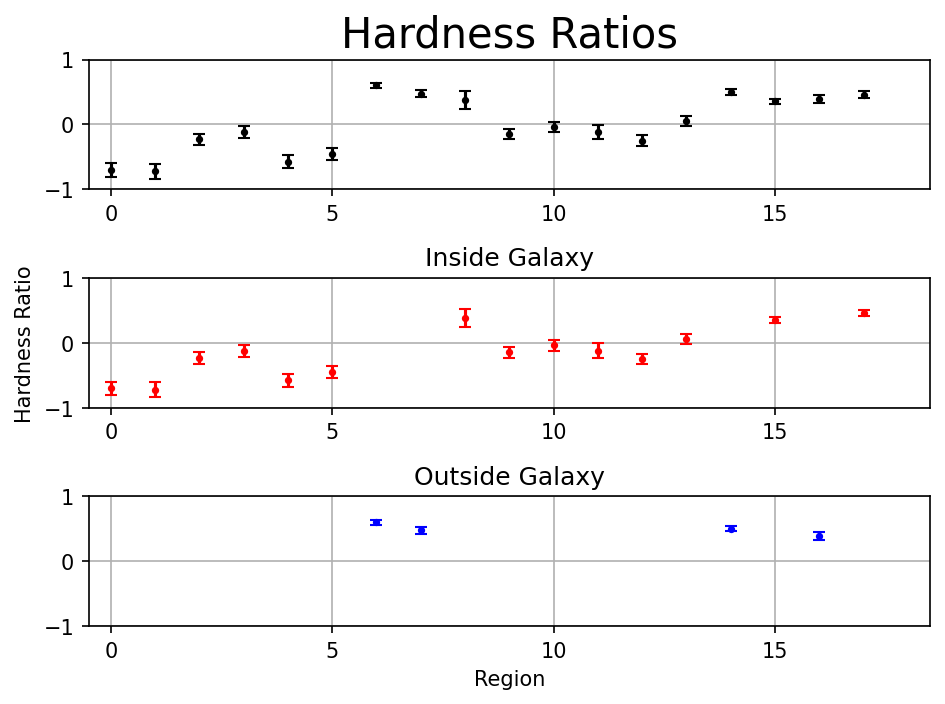

In [ ]:
# @title Comparing heatmap HRs, plotting region number on the X-axis

'''
Same entry scheme for HR errors
'''
HR_error_dict = {
0: 0.103863325666256,
1: 0.115276848129554,
2: 0.0919097817484183,
3: 0.0921689793324368,
4: 0.100642121277763,
5: 0.0914862459464075,
6: 0.0385010756947824,
7: 0.0563211476374825,
8: 0.138024470505562,
9: 0.0832759242198764,
10: 0.08104749372165,
11: 0.108333021853071,
12: 0.0820860000240099,
13: 0.0786878067756275,
14: 0.0431215524209749,
15: 0.0435661355904568,
16: 0.0592348710575614,
17: 0.0526065396478039,
}

#List of regions inside the galaxy

#voronoi trial 3
inside_galaxy = [
    0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 15, 17
]
#voronoi trial 2
# inside_galaxy = [
#     0,1,2,3,4,5,6,7,8,12,13,16,18,21,22
# ]

fig, axs = plt.subplots(3, 1, dpi=150)

#-----plot for all regions-----#
ax=axs[0]
ax.errorbar(list(HR_dict.keys()), list(HR_dict.values()), yerr=list(HR_error_dict.values()), fmt='.', color='black', capsize=3, markersize=5)
ax.set_title("Hardness Ratios", fontsize=20)

#-----plot for regions inside galaxy-----#
ax=axs[1]
HR_in_galaxy = [HR_dict[i] for i in inside_galaxy]
HR_err_in_galaxy = [HR_error_dict[i] for i in inside_galaxy]

ax.errorbar(inside_galaxy, HR_in_galaxy, yerr=HR_err_in_galaxy, fmt='.', color='red', capsize=3, markersize=5)
ax.set_ylabel("Hardness Ratio")
ax.set_title("Inside Galaxy")

#-----plot for regions outside galaxy-----#
ax=axs[2]
out_regions = [i for i in range(len(HR_dict)) if i not in inside_galaxy]
HR_out_galaxy = [HR_dict[i] for i in list(HR_dict.keys()) if i not in inside_galaxy]
HR_err_out_galaxy = [HR_error_dict[i] for i in list(HR_dict.keys()) if i not in inside_galaxy]

ax.errorbar(out_regions, HR_out_galaxy, yerr=HR_err_out_galaxy, fmt='.', color='blue', capsize=3, markersize=5)
ax.set_xlabel("Region")
ax.set_title("Outside Galaxy")

#-----set axes to be identical-----#
for ax in axs:
  ax.set_xlim(-0.5, len(HR_dict)+0.5)
  ax.set_ylim(-1, 1)
  ax.set_xticks(np.arange(0, len(HR_dict)+1, 5, dtype='int'))
  ax.grid()

plt.tight_layout()
plt.show()

Inside Galaxy:
Mean HR: -0.15128006328793545
Var HR: 0.13446206415566037
HR Std: 0.3666906927584342
Range: -0.722222222222222 - 0.459649122807017
Outside Galaxy:
Mean HR: 0.49181380614167025
Var HR: 0.005744301360861029
HR Std: 0.07579116941214872
Range: 0.388429752066115 - 0.600928074245939


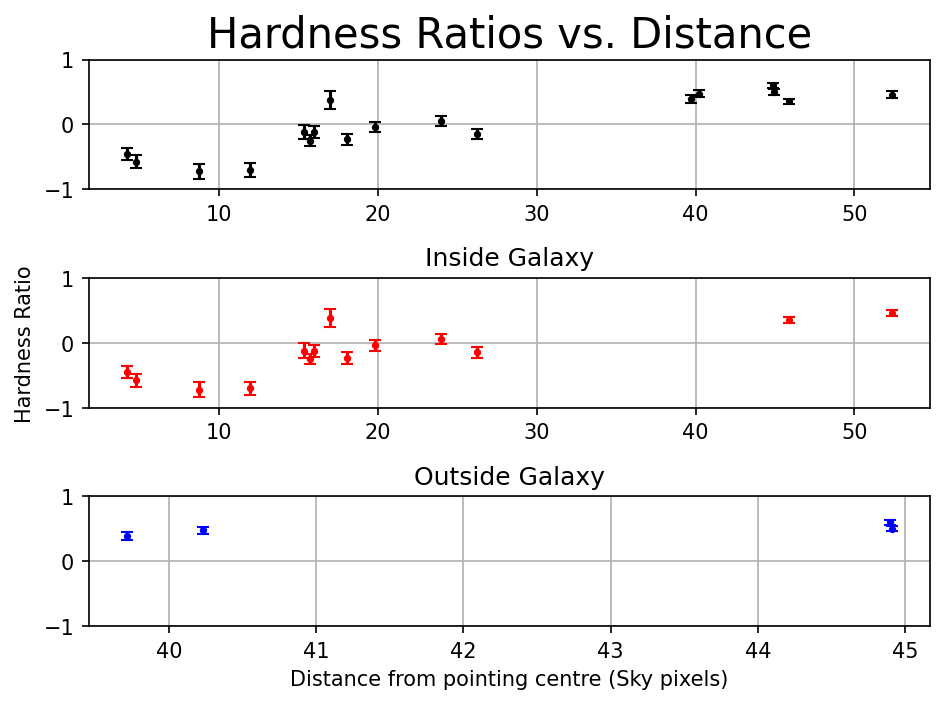

In [ ]:
# @title Comparing heatmap HRs, plotting distance from the pointing centre on the X-axis
# @markdown: Note: Voronoi bins must have been previously defined in order to use this.

#Get each region's distance from the pointing centre
def dist_from_centre(num):
  x_pixel, y_pixel = x_bar[num], y_bar[num]
  x_sky = xskylims[0] - xlims[0] + x_pixel
  y_sky = yskylims[0] - ylims[0] + y_pixel
  return np.sqrt((x_sky - pointing_center[0])**2 + (y_sky - pointing_center[1])**2)

regs = np.array(list(HR_dict.keys()))
HR = np.array(list(HR_dict.values()))
HR_err = np.array(list(HR_error_dict.values()))
region_distances = np.array([dist_from_centre(i) for i in HR_dict.keys()])

fig, axs = plt.subplots(3, 1, dpi=150)

#-----plot for all regions-----#
ax=axs[0]
ax.errorbar(region_distances, HR, yerr=HR_err, fmt='.', color='black', capsize=3, markersize=5)
ax.set_title("Hardness Ratios vs. Distance", fontsize=20)

#-----plot for regions inside galaxy-----#
ax=axs[1]
dist_in_galaxy = [region_distances[i] for i in inside_galaxy]
HR_in_galaxy = [HR[i] for i in inside_galaxy]
HR_err_in_galaxy = [HR_err[i] for i in inside_galaxy]

#get stats for these regions
print("Inside Galaxy:")
print(f"Mean HR: {np.mean(HR_in_galaxy)}")
print(f"Var HR: {np.var(HR_in_galaxy)}")
print(f"HR Std: {np.std(HR_in_galaxy)}")
print(f"Range: {np.min(HR_in_galaxy)} - {np.max(HR_in_galaxy)}")

ax.errorbar(dist_in_galaxy, HR_in_galaxy, yerr=HR_err_in_galaxy, fmt='.', color='red', capsize=3, markersize=5)
ax.set_ylabel("Hardness Ratio")
ax.set_title("Inside Galaxy")

#-----plot for regions outside galaxy-----#
ax=axs[2]
dist_out_galaxy = [region_distances[i] for i in regs if i not in inside_galaxy]
HR_out_galaxy = [HR[i] for i in regs if i not in inside_galaxy]
HR_err_out_galaxy = [HR_err[i] for i in regs if i not in inside_galaxy]

print("Outside Galaxy:")
print(f"Mean HR: {np.mean(HR_out_galaxy)}")
print(f"Var HR: {np.var(HR_out_galaxy)}")
print(f"HR Std: {np.std(HR_out_galaxy)}")
print(f"Range: {np.min(HR_out_galaxy)} - {np.max(HR_out_galaxy)}")

ax.errorbar(dist_out_galaxy, HR_out_galaxy, yerr=HR_err_out_galaxy, fmt='.', color='blue', capsize=3, markersize=5)
ax.set_xlabel("Distance from pointing centre (Sky pixels)")
ax.set_title("Outside Galaxy")

#-----set y-axis to be identical-----#
for ax in axs:
  ax.set_ylim(-1, 1)
  ax.grid()
  ax.grid(visible=True, which='minor', axis='x')

plt.tight_layout()
plt.show()

Inside Galaxy:
Mean HR: -0.15128006328793545
Var HR: 0.13446206415566037
HR Std: 0.3666906927584342
Range: -0.722222222222222 - 0.459649122807017

Outside Galaxy:
Mean HR: 0.49181380614167025
Var HR: 0.005744301360861029
HR Std: 0.07579116941214872
Range: 0.388429752066115 - 0.600928074245939


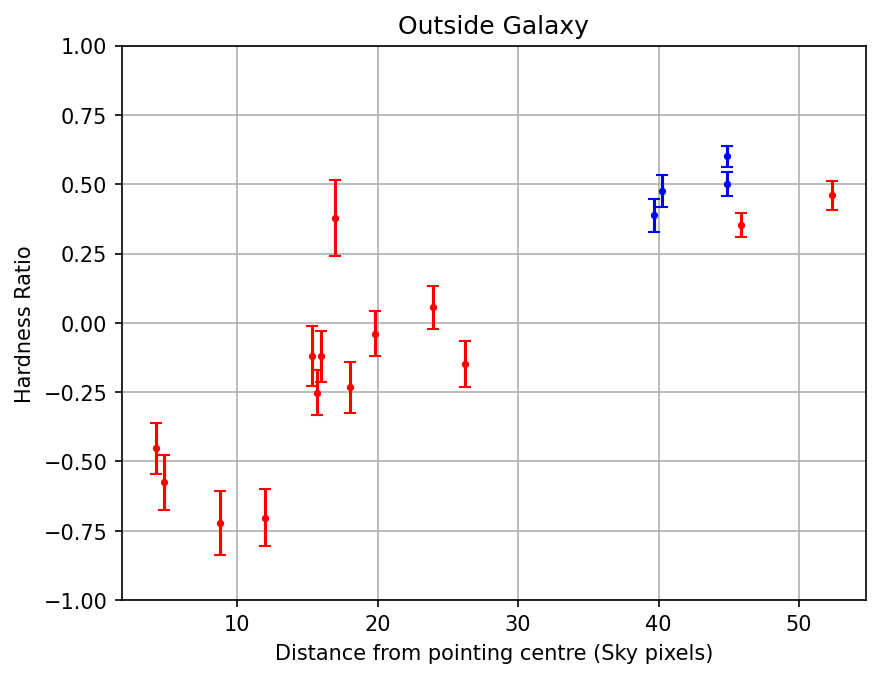

In [ ]:
# @title Same thing as above, but combine the bottom two graphs into one

fig, ax = plt.subplots(dpi=150)

ax.set_title("Hardness Ratios vs. Distance", fontsize=20)

#-----plot for regions inside galaxy-----#
dist_in_galaxy = [region_distances[i] for i in inside_galaxy]
HR_in_galaxy = [HR[i] for i in inside_galaxy]
HR_err_in_galaxy = [HR_err[i] for i in inside_galaxy]

#get stats for these regions
print("Inside Galaxy:")
print(f"Mean HR: {np.mean(HR_in_galaxy)}")
print(f"Var HR: {np.var(HR_in_galaxy)}")
print(f"HR Std: {np.std(HR_in_galaxy)}")
print(f"Range: {np.min(HR_in_galaxy)} - {np.max(HR_in_galaxy)}\n")

ax.errorbar(dist_in_galaxy, HR_in_galaxy, yerr=HR_err_in_galaxy, fmt='.', color='red', capsize=3, markersize=5)
ax.set_ylabel("Hardness Ratio")
ax.set_title("Inside Galaxy")

#-----plot for regions outside galaxy-----#
dist_out_galaxy = [region_distances[i] for i in regs if i not in inside_galaxy]
HR_out_galaxy = [HR[i] for i in regs if i not in inside_galaxy]
HR_err_out_galaxy = [HR_err[i] for i in regs if i not in inside_galaxy]

print("Outside Galaxy:")
print(f"Mean HR: {np.mean(HR_out_galaxy)}")
print(f"Var HR: {np.var(HR_out_galaxy)}")
print(f"HR Std: {np.std(HR_out_galaxy)}")
print(f"Range: {np.min(HR_out_galaxy)} - {np.max(HR_out_galaxy)}")

ax.errorbar(dist_out_galaxy, HR_out_galaxy, yerr=HR_err_out_galaxy, fmt='.', color='blue', capsize=3, markersize=5)
ax.set_xlabel("Distance from pointing centre (Sky pixels)")
ax.set_title("Outside Galaxy")

ax.set_ylim(-1, 1)
ax.grid()
ax.grid(visible=True, which='minor', axis='x')

plt.show()

# Random things I have tried

[array([10.5, 19.5]), array([11.5, 19.5])]
broken.


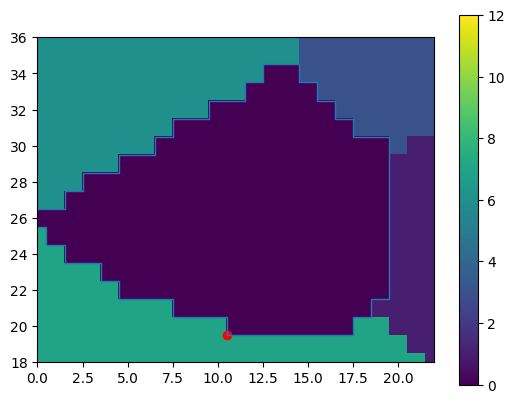

71


In [ ]:
# @title Rough draft of border-tracing function

''' Function that traces the border of each bin.'''

def trace_border(map, bin):
  #start at a guarantted border pixel-- in this case the first pixel we encounter with the required bin number
  start = np.asarray(np.unravel_index(np.argmax(map == bin), bin_image.shape))
  x, y = start[1], start[0]
  #initialise a "shadow pixel" that will stick to the cell but stay outside the bin region.
  #the shadow pixel should start just to the left of the current cell
  sx, sy = x, y-1

  #define the two corners between our two pixels and make them the first members of a list of coordinates lying along the bounds of the shape
  #IMPORTANT: coordinates should be added from left to right, i.e. in the order of our starting direction

  start_corner = np.array([x-0.5, y-0.5])
  second_corner = np.array([x+0.5, y-0.5])
  border_coords = []
  border_coords.append(start_corner)
  border_coords.append(second_corner)

  print(border_coords)

  directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]]) #possible directions, given as [delta_x, delta_y]
  d_ind = 0 #starting direction is to the right

  #move in the current direction. For various boundary conditions, change positions, record corners, or rotate the direction of the next step accordingly. stop when you have returned to the start pixel

  #set our direction
  direction = directions[d_ind]

  n = 0
  while True:

    x += direction[0]
    y += direction[1]
    sx += direction[0]
    sy += direction[1]

    # print(x, y, sx, sy)

    if map[y][x] == bin and map[sy][sx] != bin:
      new_coord = border_coords[-1] + direction
      border_coords.append(new_coord)

    if map[y][x] != bin and map[sy][sx] != bin:
      sx, sy = x, y
      x -= direction[0]
      y -= direction[1]
      d_ind = (d_ind + 1) % 4
      direction = directions[d_ind]
      new_coord = border_coords[-1] + direction
      border_coords.append(new_coord)

    if map[y][x] == bin and map[sy][sx] == bin:
      x, y = sx, sy
      sx -= direction[0]
      sy -= direction[1]
      d_ind = (d_ind - 1) % 4
      direction = directions[d_ind]
      new_coord = border_coords[-1] + direction
      border_coords.append(new_coord)

    # print(f"Current pixel: ({x}, {y}). Current shadow: ({sx}, {sy}). Corner added: {new_coord}")
    #print(x == start[1] and y == start[0])

    if x == start[1] and y == start[0]:
      print("broken.")
      break

#failsafe for while loop lol
    n += 1
    if n == 500:
      print("limit reached")
      break

  borderx = [point[0] for point in border_coords]
  bordery = [point[1] for point in border_coords]
  return borderx, bordery, start

borderx, bordery, start = trace_border(bin_image, 0)

fig, ax = plt.subplots()
im = ax.imshow(bin_image, origin='lower')
plt.colorbar(im, ax=ax)
ax.plot(borderx, bordery, lw=1)
ax.scatter(start[1]-0.5, start[0]-0.5, color='red')
ax.set_xlim(0,22)
ax.set_ylim(18, 36)
plt.show()

# print(len(borderx))

S/N: 6 Number of bins: 24


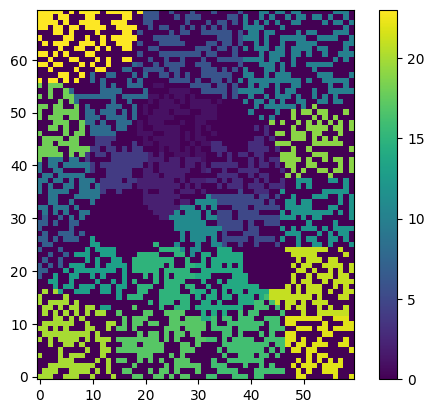

In [ ]:
# @title Voronoi binning without 0-count pixels (Only run this after getting your X and Y arrays)

''' Alternate approach: instead of messing with individual noise values,
    we simply remove all pixels with signal=0 before we Voronoi bin.'''

removearr = np.where(counts == 0)

counts2 = np.delete(counts, removearr)
counts_noise2 = np.delete(counts_noise, removearr)
X2 = np.delete(X, removearr)
Y2 = np.delete(Y, removearr)

#trying out a few values of S/N

test_sn = 6

bin_number, x_gen, y_gen, x_bar, y_bar, sn, nPixels, scale = voronoi_2d_binning(X2, Y2, counts2, counts_noise2, target_sn=test_sn, pixelsize=1, plot=False)
print(f"S/N: {test_sn} Number of bins: {max(bin_number)+1}")

''' A promising one here could be SN=7.
    However, it likely isn't correct to run the code this way because
    'connectedness' to the rest of the bin is a factor taken into consideration
    when adding new pixels.
    For the time being, I am shelving this idea and running the code with
    0-pixels included.'''

binmap = np.zeros((height, width))

xcoords = X2 - xlims[0]
ycoords = Y2 - ylims[0]

for i in range(len(X2)):
  binmap[ycoords[i]][xcoords[i]] = bin_number[i]

plt.imshow(binmap, origin='lower')
plt.colorbar()